In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import random

In [96]:
traffic_data = pd.read_csv('KC Survey_All Years.csv')
traffic_data.head(5)

,zip,work_outside_home,Commute,beh_read,beh_type,beh_handheld,beh_handfree,...,Language,legal_gps2122,legal_music2122,legal_app2122,year,month,day
0,98001,1,1.0,2,2,3,5,...,NaN,NaN,NaN,NaN,2018,6,17
1,98052,1,1.0,5,5,5,2,...,NaN,NaN,NaN,NaN,2018,6,17
2,98042,1,1.0,5,5,2,2,...,NaN,NaN,NaN,NaN,2018,6,17
3,98028,2,NaN,5,5,5,5,...,NaN,NaN,NaN,NaN,2018,6,17
4,98003,2,NaN,5,5,5,3,...,NaN,NaN,NaN,NaN,2018,6,17


In [97]:
traffic_data = traffic_data.drop(['Language', 'legal_gps2122','legal_music2122','legal_app2122'], axis=1)

In [98]:
traffic_data.sort_values('zip')
traffic_data['zip'].value_counts()

98052    116
98003    113
98125    100
98002     98
98023     95
        ... 
98165      1
98158      1
98194      1
98141      1
98138      1
Name: zip, Length: 117, dtype: int64

<Axes: >

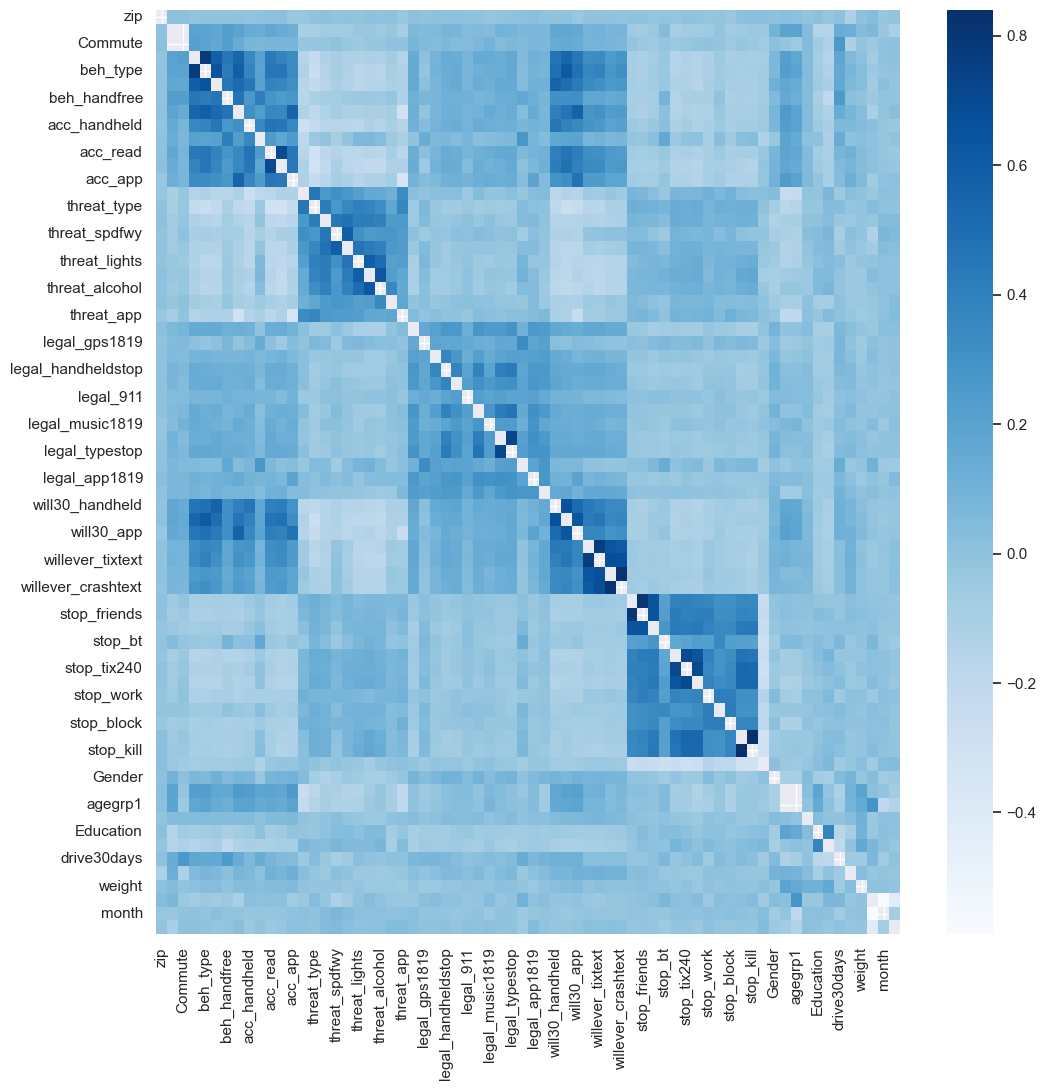

In [99]:
# sns.heatmap(traffic_data.corr(), 
#         xticklabels=traffic_data.corr().columns,
#         yticklabels=traffic_data.corr().columns)
sns.set(rc={'figure.figsize':(12,12)})
c = traffic_data.corr()
sns.heatmap(c, cmap="Blues", annot=False, mask = (np.abs(c) >= 0.85))


In [100]:
traffic_data = pd.read_csv('named_data.csv')
traffic_data.head(5)

,zip,work_outside_home,Commute,beh_read,beh_type,beh_handheld,beh_handfree,...,Income,drive30days,Urbanicity,weight,year,month,day
0,98001,1,1.0,Fairly Often,Fairly Often,Rarely,Never,...,$80K - $120K,Yes,Suburban,0.611521,2018,6,17
1,98052,1,1.0,Never,Never,Never,Fairly Often,...,$80K - $120K,No,Suburban,1.077168,2018,6,17
2,98042,1,1.0,Never,Never,Fairly Often,Fairly Often,...,$120 - $160K,Yes,Suburban,1.459666,2018,6,17
3,98028,2,NaN,Never,Never,Never,Never,...,< $40K,No,Suburban,0.602725,2018,6,17
4,98003,2,NaN,Never,Never,Never,Rarely,...,$40K - $80K,Yes,Suburban,0.498099,2018,6,17


# DATA ANALYSIS

In [101]:
import matplotlib.pyplot as plt
import plotly.express as px

In [102]:
data = pd.read_csv('named_data.csv')

#Categorize those who are aware and those who need awareness
conversion_dict = {'Regularly': 'Need Awareness', 'Fairly Often': 'Need Awareness','Never': 'Aware', 'Rarely': 'Aware', 'Just Once': 'Aware', 'Not Sure': 'Need Awareness'}
data['beh_read'] = data['beh_read'].replace(conversion_dict)

#Group the data by zip code and beh read and get the number of occurance of each behaviour type within each zip code
counts = data.groupby(['zip', 'beh_read']).size()

#Calculate the total number of respondents for each zip code
total_counts = data.groupby('zip').size()

#Retain only those zip codes that have over 10 respondents
counts = counts[counts.index.get_level_values('zip').map(total_counts) > 10]

#Divide the count for each group by its corresponding total count, and multiply by 100 to get the percentage
percentages = (counts / total_counts).mul(100)

#Create a new dataframe with the count and percentage columns
beh_read_data = pd.concat([counts, percentages], axis=1)
beh_read_data.columns = ['count', 'percentage']

# reset the index to make zip and beh_read columns
beh_read_data = beh_read_data.reset_index()

#Convert the zip codes into string for easier plotting
beh_read_data['zip'] = beh_read_data['zip'].astype(str)
beh_read_data
beh_read_data = beh_read_data.sort_values('percentage', ascending=False)
#Plot the data
fig = px.bar(beh_read_data, x = 'zip', y = 'percentage', color ='beh_read') 
fig.update_layout(title = f"Percentage of survery respondents who need awareness regarding reading while driving",
     xaxis_title = 'Zip Code', yaxis_title = 'Percentage', hovermode=False, legend_title_text='Reading while driving')
fig.update_layout(xaxis={"dtick":1})
fig.show()
#


In [103]:
data = pd.read_csv('named_data.csv')

#Categorize those who are aware and those who need awareness
conversion_dict = {'Regularly': 'Need Awareness', 'Fairly Often': 'Need Awareness','Never': 'Aware', 'Rarely': 'Aware', 'Just Once': 'Aware', 'Not Sure': 'Need Awareness'}
data['beh_type'] = data['beh_type'].replace(conversion_dict)

#Group the data by zip code and beh read and get the number of occurance of each behaviour type within each zip code
counts = data.groupby(['zip', 'beh_type']).size()

#Calculate the total number of respondents for each zip code
total_counts = data.groupby('zip').size()

#Retain only those zip codes that have over 10 respondents
counts = counts[counts.index.get_level_values('zip').map(total_counts) > 10]

#Divide the count for each group by its corresponding total count, and multiply by 100 to get the percentage
percentages = (counts / total_counts).mul(100)

#Create a new dataframe with the count and percentage columns
beh_read_data = pd.concat([counts, percentages], axis=1)
beh_read_data.columns = ['count', 'percentage']

# reset the index to make zip and beh_read columns
beh_read_data = beh_read_data.reset_index()

#Convert the zip codes into string for easier plotting
beh_read_data['zip'] = beh_read_data['zip'].astype(str)
beh_read_data
beh_read_data = beh_read_data.sort_values('percentage', ascending=False)
#Plot the data
fig = px.bar(beh_read_data, x = 'zip', y = 'percentage', color ='beh_type') 
fig.update_layout(title = f"Percentage of survery respondents who need awareness regarding reading while driving",
     xaxis_title = 'Zip Code', yaxis_title = 'Percentage', hovermode=False, legend_title_text='Reading while driving')
fig.update_layout(xaxis={"dtick":1})
fig.show()

In [104]:
traffic_data = pd.read_csv('KC Survey_All Years.csv')
traffic_data.head(5)

,zip,work_outside_home,Commute,beh_read,beh_type,beh_handheld,beh_handfree,...,Language,legal_gps2122,legal_music2122,legal_app2122,year,month,day
0,98001,1,1.0,2,2,3,5,...,NaN,NaN,NaN,NaN,2018,6,17
1,98052,1,1.0,5,5,5,2,...,NaN,NaN,NaN,NaN,2018,6,17
2,98042,1,1.0,5,5,2,2,...,NaN,NaN,NaN,NaN,2018,6,17
3,98028,2,NaN,5,5,5,5,...,NaN,NaN,NaN,NaN,2018,6,17
4,98003,2,NaN,5,5,5,3,...,NaN,NaN,NaN,NaN,2018,6,17


Define a function that changes the not sure value to a random reply

In [105]:
def modify_ns(frame, ns_val, min, max):
    return np.where((frame)==ns_val,random.randint(min,max) , frame)

Generate the beh score

In [106]:
for column in (traffic_data.loc[:, 'beh_read':'beh_app']).columns:
    traffic_data[column] = modify_ns(traffic_data[column], 6, 4, 5)

traffic_data['beh_score']=20-traffic_data['beh_read']-traffic_data['beh_type']-traffic_data['beh_handheld']-traffic_data['beh_app']

In [107]:

for column in (traffic_data.loc[:, 'acc_handheld':'acc_app']).columns:
    traffic_data[column] = modify_ns(traffic_data[column], 5, 3, 4)
    
traffic_data['acc_score']=20-traffic_data['acc_handheld']-traffic_data['acc_handfree']-traffic_data['acc_read']-traffic_data['acc_type']-traffic_data['acc_app']

In [108]:

for column in (traffic_data.loc[:, 'threat_talk':'threat_app']).columns:
    traffic_data[column] = modify_ns(traffic_data[column], 5, 3, 4)
    traffic_data[column]=traffic_data[column].fillna(value=0)
    
traffic_data['threat_score'] = 0   
for column in (traffic_data.loc[:, 'threat_talk':'threat_app']).columns:
    traffic_data['threat_score']= traffic_data['threat_score'] + traffic_data[column]


In [109]:
for column in (traffic_data.loc[:, 'legal_addgps':'legal_video']).columns:
    traffic_data[column] = modify_ns(traffic_data[column], 3, 1, 2)
    traffic_data[column]=traffic_data[column].fillna(value=0)
    
traffic_data['legal_score']=32
for column in (traffic_data.loc[:, 'legal_addgps':'legal_video']).columns:
    traffic_data['legal_score'] = traffic_data['legal_score']-traffic_data[column]


In [110]:
for column in (traffic_data.loc[:, 'will30_handheld':'willever_crashtext']).columns:
    traffic_data[column] = modify_ns(traffic_data[column], 5, 3, 4)
    traffic_data[column]=traffic_data[column].fillna(value=0)
    
traffic_data['will_score']=28
for column in (traffic_data.loc[:, 'will30_handheld':'willever_crashtext']).columns:
    traffic_data['will_score'] = traffic_data['will_score']-traffic_data[column]

In [115]:
traffic_data['Nonawareness_score'] = traffic_data['beh_score']+traffic_data['acc_score']+traffic_data['threat_score']+traffic_data['legal_score']+traffic_data['will_score']

In [126]:
pd.set_option('display.max_columns', 18)
traffic_data
traffic_data.to_csv('scored_csv.csv')


Lets analyze the change in Non awareness score throughout the years

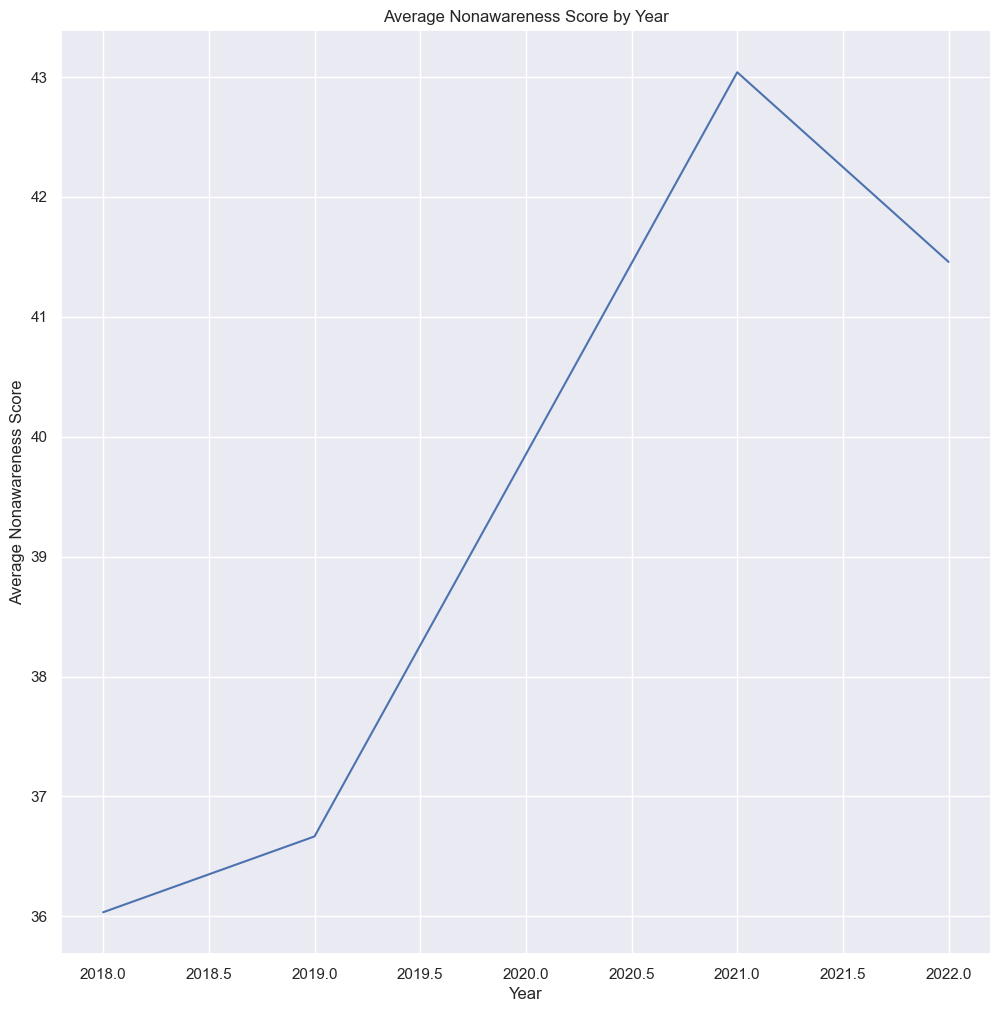

In [122]:

traffic_data.groupby('year')['Nonawareness_score'].mean().plot(kind='line')
plt.title('Average Nonawareness Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Nonawareness Score')
plt.show()


In [129]:
pd.pivot_table(traffic_data, values='Nonawareness_score', index='zip', columns='year', aggfunc='mean')

year,2018,2019,2021,2022
zip,,,,
98001,33.250000,33.900000,50.400000,42.590909
98002,35.047619,35.565217,45.578947,41.314286
98003,34.266667,35.125000,36.608696,37.071429
98004,34.300000,38.909091,39.583333,51.300000
98005,43.000000,40.000000,41.888889,41.000000
...,...,...,...,...
98195,NaN,40.500000,36.000000,NaN
98198,35.333333,38.631579,44.136364,39.411765
98199,28.666667,34.250000,39.250000,46.000000


In [128]:
pd.pivot_table(traffic_data, values='Nonawareness_score', index='zip', columns='year', aggfunc='mean').pct_change(axis='columns')
# df = df.set_index('zip')

# calculate percentage change by year
# pct_change = df.pct_change(axis='columns')

year,2018,2019,2021,2022
zip,,,,
98001,NaN,0.019549,0.486726,-0.154942
98002,NaN,0.014768,0.281560,-0.093566
98003,NaN,0.025049,0.042240,0.012640
98004,NaN,0.134376,0.017329,0.296000
98005,NaN,-0.069767,0.047222,-0.021220
...,...,...,...,...
98195,NaN,NaN,-0.111111,0.000000
98198,NaN,0.093347,0.142494,-0.107045
98199,NaN,0.194767,0.145985,0.171975
